In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from ipywidgets import interact_manual

Using TensorFlow backend.


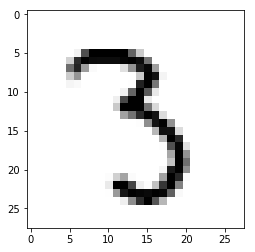

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[8888],cmap='Greys')

In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [4]:
model = Sequential()
model.add(Dense(80, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(40))
model.add(Activation('tanh'))
model.add(Dense(20))
model.add(Activation('tanh'))
model.add(Dense(10))
model.add(Activation('softmax'))

In [5]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 80)                62800     
_________________________________________________________________
activation_1 (Activation)    (None, 80)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3240      
_________________________________________________________________
activation_2 (Activation)    (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 20)                820       
_________________________________________________________________
activation_3 (Activation)    (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                210       
__________

In [6]:
model.compile(loss='mse', optimizer=SGD(lr=0.2), metrics=['accuracy'])

In [7]:
model.fit(x_train, y_train, batch_size=200, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 53us/step - loss: 0.0775 - acc: 0.3843
Epoch 2/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0539 - acc: 0.6614
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0372 - acc: 0.8086
Epoch 4/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0262 - acc: 0.8636
Epoch 5/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.0208 - acc: 0.8823
Epoch 6/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0179 - acc: 0.8953
Epoch 7/20
60000/60000 [==============================] - 1s 20us/step - loss: 0.0161 - acc: 0.9035
Epoch 8/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0149 - acc: 0.9096
Epoch 9/20
60000/60000 [==============================] - 1s 21us/step - loss: 0.0140 - acc: 0.9144
Epoch 10/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.0132 - acc: 0.9180

In [8]:
score = model.evaluate(x_test,y_test)

10000/10000 [==============================] - 0s 45us/step


In [9]:
print("loss",score[0])
print("正確率",score[1])

loss 0.009825435787951574
正確率 0.9377


In [10]:
predict = model.predict_classes(x_test)
def test(x):
    plt.imshow(x_test[x].reshape(28,28),cmap='Greys')
    print("神經網路判斷為：",predict[x])

神經網路判斷為： 3


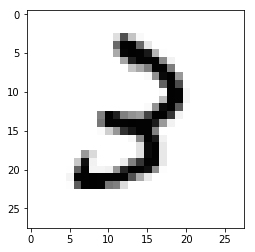

In [11]:
test(63)

In [12]:
interact_manual(test,x =(0,100))

interactive(children=(IntSlider(value=50, description='x'), Button(description='Run Interact', style=ButtonSty…

<function __main__.test(x)>